# Projet 4 : Anticipez les besoins en consommation électrique de bâtiments

La ville de Seatle souhaite atteindre son objectif de ville neutre en émissions de carbonne en 2050. 

Elle souhaite dans un premier temps :

Obtenir une prédiction des émissions de Co2 et de la consommation totale d'énergie des bâtiments pour lesquels elles n'ont pas été mesurées

Evaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions

Les données téléchargeable via : https://www.kaggle.com/datasets/city-of-seattle/sea-building-energy-benchmarking

Objectif : 
Prédire Co2 et consommation des bâtiments pour les batiments qui n'ont pas été mesurées 

Démarche suivi :

    1/ Récupération et découverte des données / EDA (Exploratory Data Analysis)
            Affichage et structure des données
                En 2015 : 3340 entrées et 47 colonnes 
                En 2016 : 3376 entrées et 46 colonnes
                Pas de doublon observé  à ce stade
                Fichier assez bien rempli
                    En 2015 : 83% rempli 
                    En 2016 : 87% rempli
            Type des variables
                En 2015 : int, float, object 
                En 2016 : int, float, object et bool
            Différence de données 2015 vs 2016
            Unicité
            Pour 2015 : 56 bâtiments absents pour 2016, Pour 2016 : 92  bâtiments absents pour 2015
            Renommage de colonnes
            Correspondance des colonnes
            Concaténation des données de 2015 et 2016 dans un DataFrame data

    2/ Nettoyage des données (attention au dataleakage, faire feature engineering/selection)/ Pre-processing
            Selection de données
            Selection des colonnes pertinentes
            Traitement des outliers (aberrations)
            Données manquantes (NaN)
            Catégorisation et regroupements


    3/ Exploration des données
            Séléction des variables importantes
            Analyse des données
            Préparation des données

    4/ Création des modèles / Modeling
            Linéaire
                Régression Ridge (Régularisation de TYKHONOV)
                Régression Elastic Net
            Non Linéaire
                KernelRidge
                SVR (Support Vector Regression)
     
     5/ Evaluation de la qualité des modèles
                 RMSE+MSE++MAE+R2
     
     6/ Optminisation des modèles (hyperparamètres)
         GridsearchCV
     
     7/ Analyse avec l'ENERGY STAR Score
     
     Informations complémentaires diposnible : https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what

### Chargement des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import missingno as msno
from functions import *
import warnings # supress warnings
warnings.filterwarnings('ignore')

### Récupération et découverte des données

In [2]:
data_2015 = pd.read_csv("2015-building-energy-benchmarking.csv", sep=",")
data_2016 = pd.read_csv("2016-building-energy-benchmarking.csv", sep=",")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

#### Découverte du fichier 2015


In [3]:
data_2015.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [4]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [5]:
print((data_2015.isnull().mean()).sort_values(ascending=[False]))

Comment                                                          0.996108
Outlier                                                          0.974850
YearsENERGYSTARCertified                                         0.967066
City Council Districts                                           0.936228
2010 Census Tracts                                               0.932934
ThirdLargestPropertyUseTypeGFA                                   0.832335
ThirdLargestPropertyUseType                                      0.832335
SecondLargestPropertyUseTypeGFA                                  0.533234
SecondLargestPropertyUseType                                     0.533234
ENERGYSTARScore                                                  0.233533
LargestPropertyUseTypeGFA                                        0.040719
LargestPropertyUseType                                           0.040719
ListOfAllPropertyUseTypes                                        0.038024
GHGEmissionsIntensity(kgCO2e/ft2)     

In [6]:
data_2015.duplicated(keep=False).sum()

0

In [7]:
data_2015.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,90.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [8]:
data_2015.shape

(3340, 47)

<AxesSubplot:>

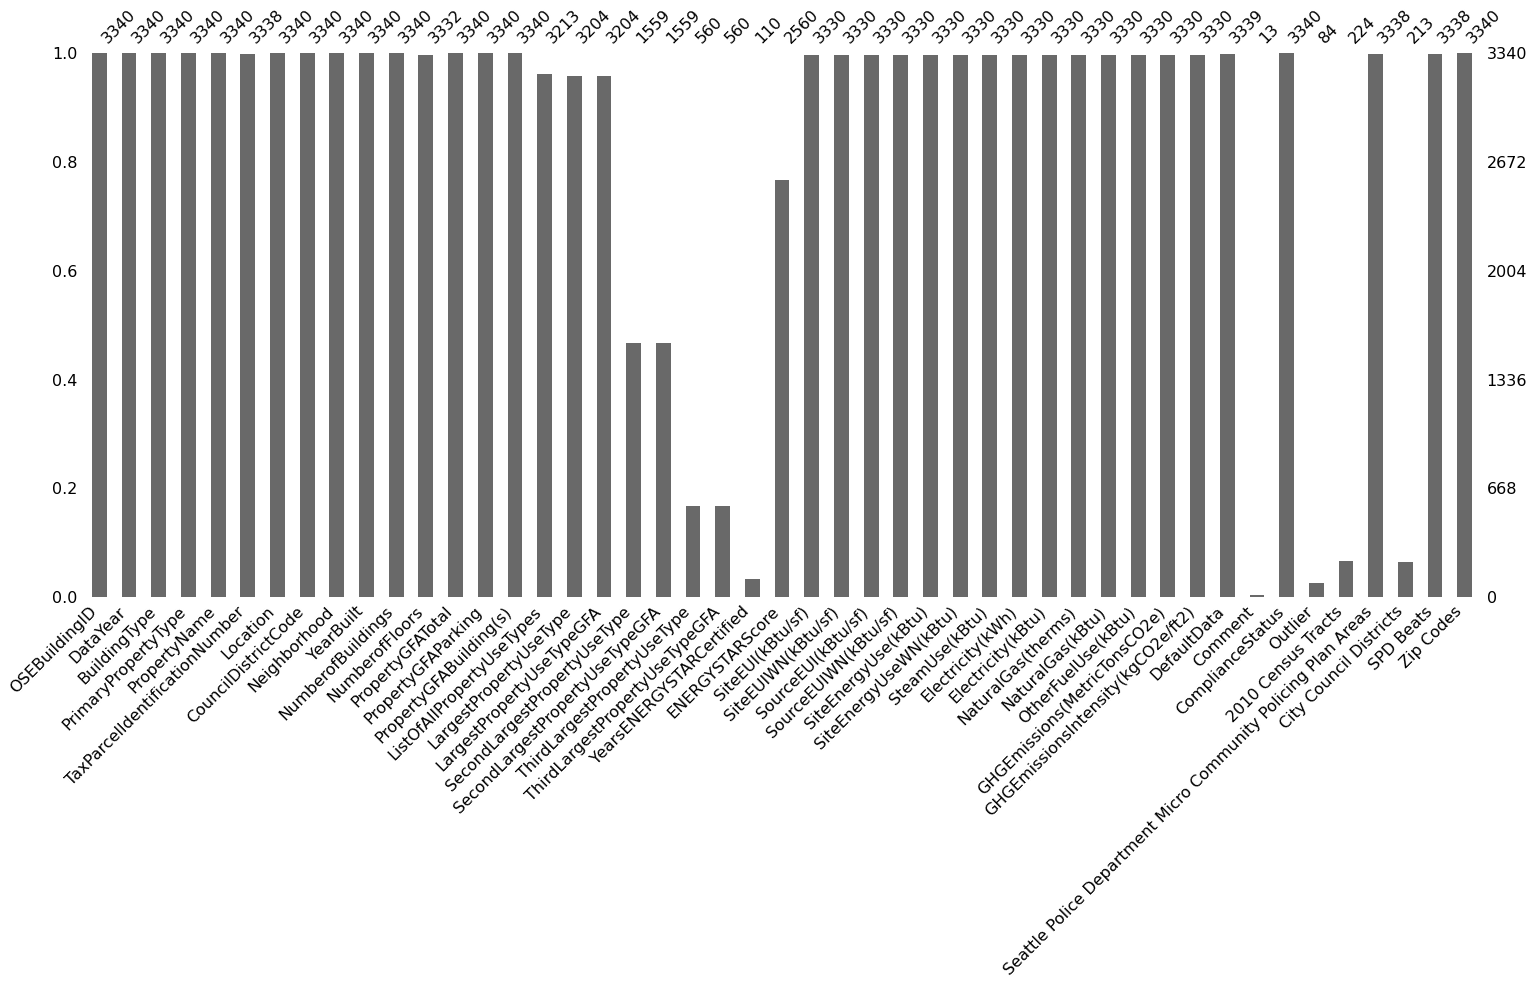

In [9]:
msno.bar(data_2015)

#### Découverte du fichier 2016

In [10]:
data_2016.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86


In [11]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [12]:
print((data_2016.isnull().mean()).sort_values(ascending=[False]))

Comments                           1.000000
Outlier                            0.990521
YearsENERGYSTARCertified           0.964751
ThirdLargestPropertyUseType        0.823460
ThirdLargestPropertyUseTypeGFA     0.823460
SecondLargestPropertyUseType       0.502666
SecondLargestPropertyUseTypeGFA    0.502666
ENERGYSTARScore                    0.249704
LargestPropertyUseTypeGFA          0.005924
LargestPropertyUseType             0.005924
ZipCode                            0.004739
ListOfAllPropertyUseTypes          0.002666
SourceEUIWN(kBtu/sf)               0.002666
SourceEUI(kBtu/sf)                 0.002666
Electricity(kWh)                   0.002666
Electricity(kBtu)                  0.002666
NaturalGas(therms)                 0.002666
NaturalGas(kBtu)                   0.002666
TotalGHGEmissions                  0.002666
SteamUse(kBtu)                     0.002666
GHGEmissionsIntensity              0.002666
NumberofBuildings                  0.002370
SiteEUI(kBtu/sf)                

In [13]:
data_2016.duplicated(keep=False).sum()

0

In [14]:
data_2016["OSEBuildingID"].duplicated(keep=False).sum()

0

In [15]:
data_2016.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [16]:
data_2016.shape

(3376, 46)

<AxesSubplot:>

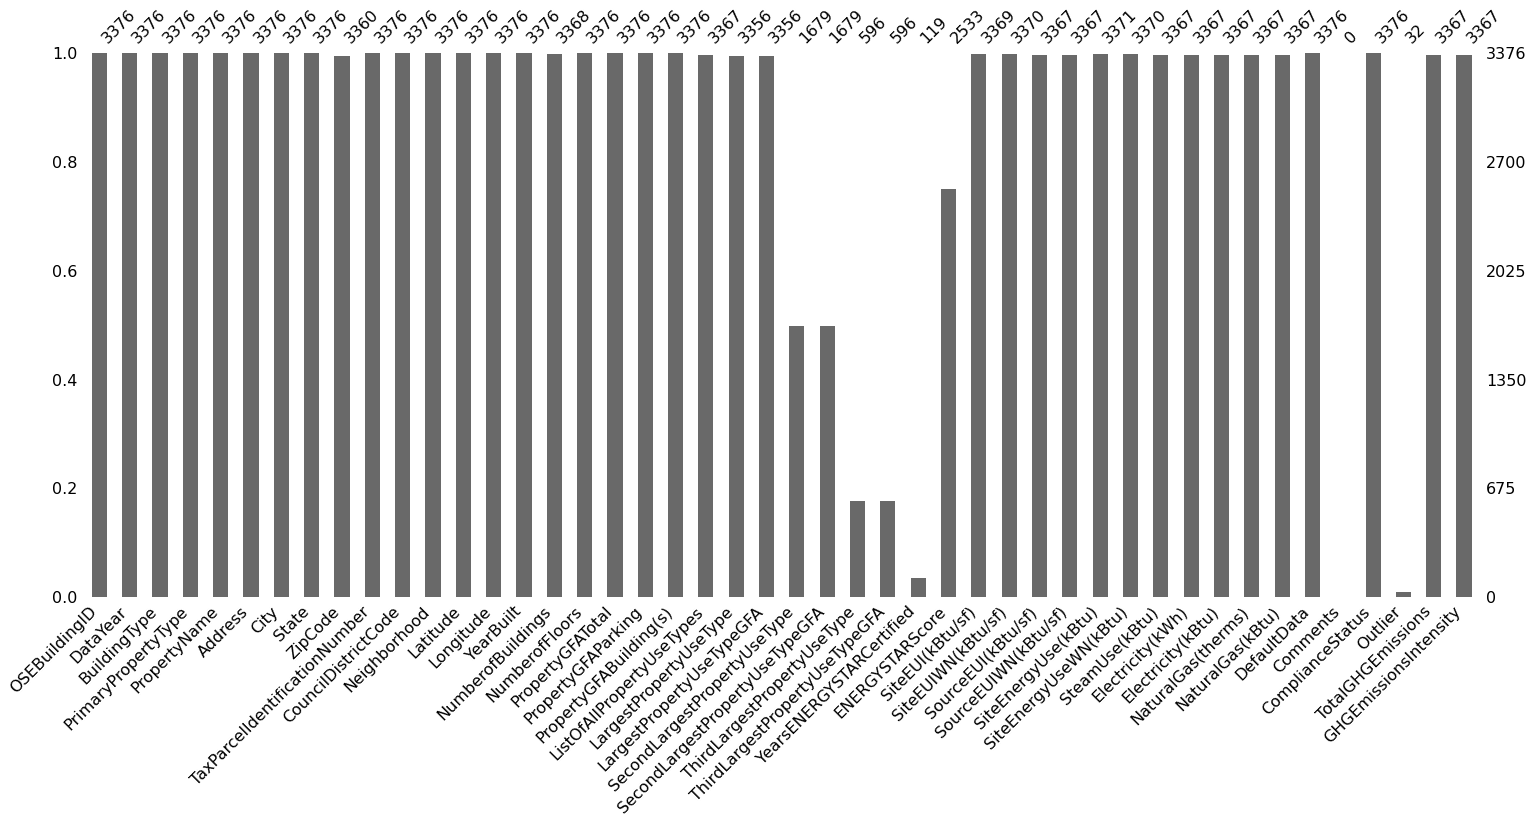

In [17]:
msno.bar(data_2016)

### Comparaison entre 2015 et 2016

In [18]:
print("En 2015, {} batiments relevé".format(data_2015["OSEBuildingID"].nunique()))
print("En 2016, {} batiments relevé".format(data_2016["OSEBuildingID"].nunique()))

En 2015, 3340 batiments relevé
En 2016, 3376 batiments relevé


<AxesSubplot:ylabel='None'>

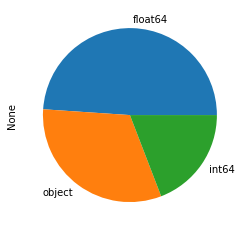

In [19]:
data_2015.dtypes.value_counts().plot.pie()

<AxesSubplot:ylabel='None'>

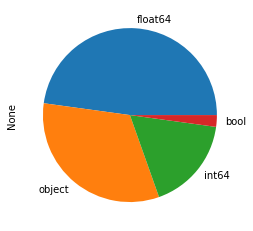

In [20]:
data_2016.dtypes.value_counts().plot.pie()

In [21]:
def taux_remplissage(Food):
    nb_rows, nb_columns = Food.shape # Définition ligne et colonnes du dataframe Food
    nb_data = Food.count().sum()# Comptage du nombre de non-NaN (.count ne compte pas les NaN)
    taux_remplissage = nb_data / (nb_rows * nb_columns)# calcul du taux de remplissage
    labels = ["Données remplies", "Données manquantes"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Remplissage du jeu de données", fontsize=25)
    ax.axis("equal")
     
    ax.pie([taux_remplissage, 1 - taux_remplissage],
           labels = labels,
           explode = (0.1, 0),
           autopct='%1.2f%%',
           shadow=True)
    plt.legend(labels,bbox_to_anchor=(1, 1), loc=2)

Text(0.5, 1.0, 'Remplissage du jeu de données 2016')

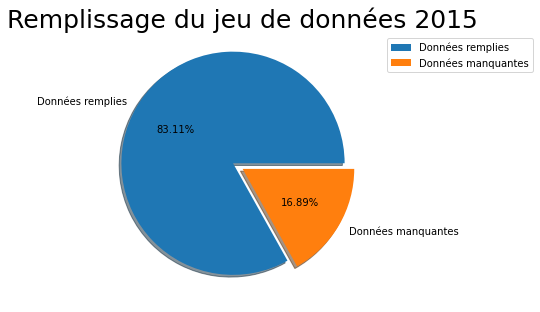

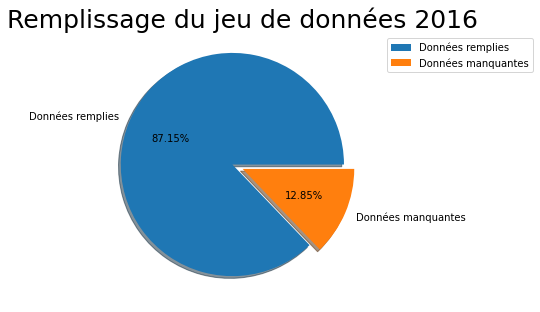

In [22]:
taux_remplissage(data_2015)
plt.title("Remplissage du jeu de données 2015", fontsize=25)
taux_remplissage(data_2016)
plt.title("Remplissage du jeu de données 2016", fontsize=25)

Text(0.5, 1.0, 'Ensemble des données quantitatives 2016')

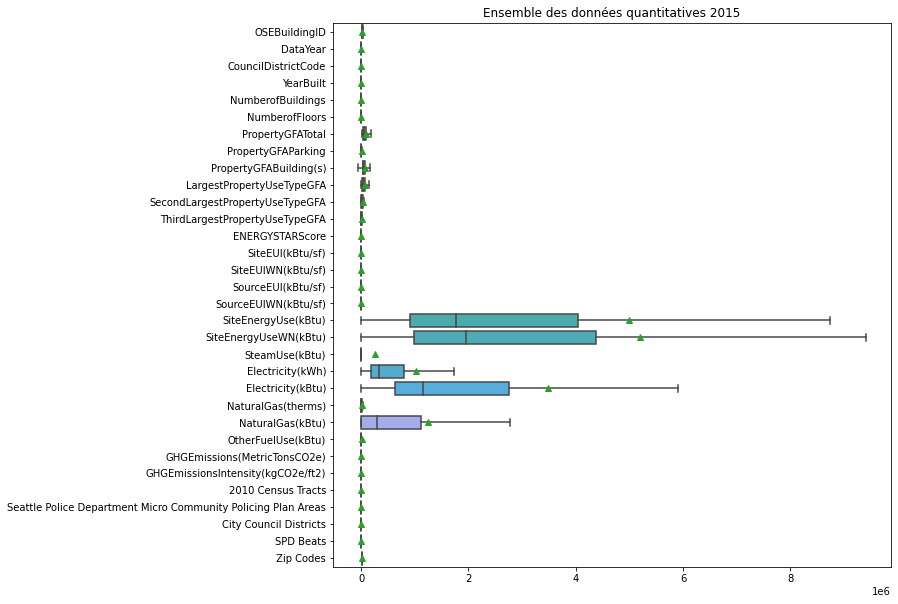

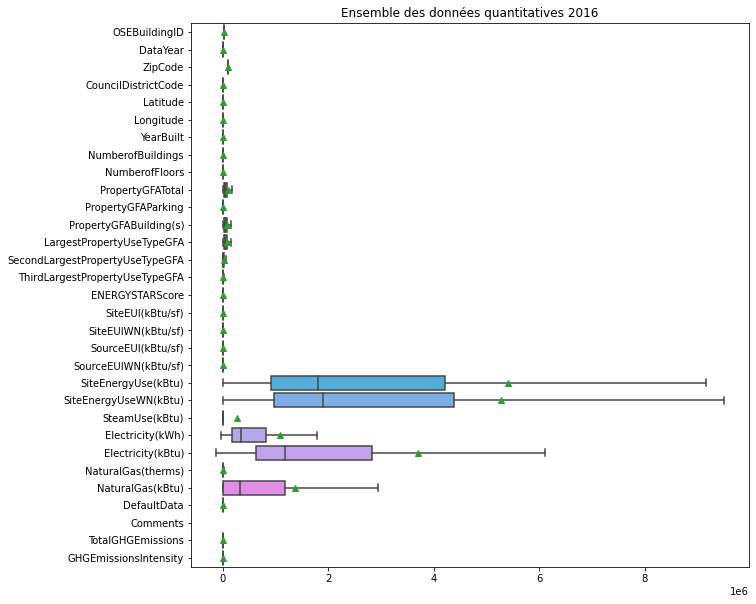

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
sns.boxplot(data=data_2015, orient='h', showfliers=False, showmeans=True
           ).set_title('Ensemble des données quantitatives 2015')

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
sns.boxplot(data=data_2016, orient='h', showfliers=False, showmeans=True
           ).set_title('Ensemble des données quantitatives 2016')

In [24]:
# Colonnes 2015 qui ne sont pas en 2016
[col for col in data_2015 if col not in data_2016]

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [25]:
# Colonnes 2016 qui ne sont pas en 2015
[col for col in data_2016 if col not in data_2015]

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [26]:
# Colonnes communes aux 2 années
[col for col in data_2016 if col in data_2015]

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

#### On vérifie que les batiments relevés sont identiques pour 2015 et 2016

In [27]:
# Batiments 2015 dont les OSEBuildingID absents en 2016
OSEBuildingID_2015 = [OSEBuildingID for OSEBuildingID in data_2015["OSEBuildingID"] 
                 if OSEBuildingID not in data_2016["OSEBuildingID"].values]

print("Pour 2015 : {} bâtiments absents pour 2016".format(len(OSEBuildingID_2015)))

Pour 2015 : 56 bâtiments absents pour 2016


In [28]:
# Batiments 2016 dont les OSEBuildingID absents en 2015
OSEBuildingID_2016 = [OSEBuildingID for OSEBuildingID in data_2016["OSEBuildingID"] 
                 if OSEBuildingID not in data_2015["OSEBuildingID"].values]

print("Pour 2016 : {}  bâtiments absents pour 2015".format(len(OSEBuildingID_2016)))

Pour 2016 : 92  bâtiments absents pour 2015


#### Renommage de colonnes ayant correspondances

In [29]:
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                          'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity',
                          'Comment': 'Comments'},
                 inplace=True)

In [30]:
data_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [31]:
import ast
data_2015['Location'] = [ast.literal_eval(str(item)) for index, item in data_2015.Location.iteritems()]
data_2015 = pd.concat([data_2015.drop(['Location'], axis=1), data_2015['Location'].apply(pd.Series)], axis=1)
data_2015['human_address'] = [ast.literal_eval(str(item)) for index, item in data_2015.human_address.iteritems()]
data_2015 = pd.concat([data_2015.drop(['human_address'], axis=1), data_2015['human_address'].apply(pd.Series)], axis=1)
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,...,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,...,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,...,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,...,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,...,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [32]:
data_2015 = data_2015.rename(columns={"latitude":"Latitude", 
                                  "longitude":"Longitude",
                                  "address":"Address", 
                                  "city":"City", 
                                  "state":"State", 
                                  "zip":"ZipCode"})

In [33]:
# Création de la colonne "OtherFuelUse(kBtu)" pour data_2016 remplie de 0
data_2016["OtherFuelUse(kBtu)"] = 0

# On récupère tous les bâtiments dont la différence entre l'energie totale
# et les énergies des différentes est supérieur à 1e3 (valeur au delà de laquelle on sait
# que la différence n'est pas du à des erreurs de mesure)
cond_to_fill = (data_2016["SiteEnergyUse(kBtu)"]
                - data_2016["SteamUse(kBtu)"]
                - data_2016["Electricity(kBtu)"]
                - data_2016["NaturalGas(kBtu)"]) > 1e3

# On remplace les valeurs des bâtiments trouvés précedemment par la différence calculé
data_2016.loc[cond_to_fill, "OtherFuelUse(kBtu)"] = (data_2016["SiteEnergyUse(kBtu)"]
                                                    - data_2016["SteamUse(kBtu)"]
                                                    - data_2016["Electricity(kBtu)"]
                                                    - data_2016["NaturalGas(kBtu)"])

# Pour l'année 2015, les valeurs manquantes
# de la colonne "OtherFuelUse(kBtu)" sont remplacés par des 0
data_2015["OtherFuelUse(kBtu)"].fillna(0, inplace=True)

#### Suppression des colonnes différentes 

In [34]:
data_2015.drop(['2010 Census Tracts',
              'Seattle Police Department Micro Community Policing Plan Areas',
              'City Council Districts','SPD Beats', 
              'Zip Codes'], axis=1, inplace=True)

In [35]:
pd.DataFrame([data_2015.dtypes, data_2016.dtypes])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,int64,int64,object,object,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object
1,int64,int64,object,object,object,object,int64,object,int64,float64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,object,object,float64,float64,object,object,object,float64


In [36]:
data_2015[['Latitude','Longitude', 'ZipCode']] = data_2015[['Latitude','Longitude', 'ZipCode']].astype('float64')

In [37]:
data = pd.concat([data_2015[data_2016.columns],data_2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"])

Text(0.5, 1.0, 'Remplissage du jeu de données concaténé')

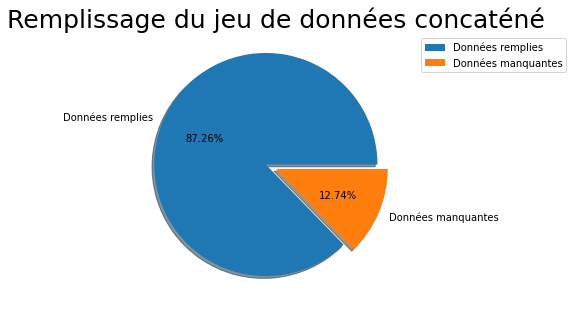

In [38]:
taux_remplissage(data)
plt.title("Remplissage du jeu de données concaténé", fontsize=25)

Suppression des batiments n'ayant pas chaque source d'énergie égale à la consommation totale 

In [40]:
list_energy = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)', "OtherFuelUse(kBtu)"]
data["diff_energy"] = abs((data[list_energy].sum(axis=1) - data["SiteEnergyUse(kBtu)"]))/(data["SiteEnergyUse(kBtu)"]+0.0001)
data = data[data["diff_energy"]<1e-4]
data.drop(columns=["diff_energy"], inplace=True)

In [41]:
#On retire les batiments à destination d'habitations
data = data[~data['BuildingType'].str.contains("Multifamily")]

#### Features Selection

Acronymes des variables\
GHG: greenhouse gas emissions, correspond aux émissions des gazs à effets de serre.\
OSE: Seattle Office of Sustainability and Environment.\
EUI: Energy Use Intensity.\
kBtu: kilo-British thermal unit, 1 kWh = 3.412 kBtu.\
sf: square feet, 1m² = 10,7639sf.\
WN: weather-normalized, normalisé vis à vis des conditions climatiques.\
GFA: Gross floor area, Surface de plancher brute - La surface de plancher couverte (par un toit, même sans mur) totale contenue dans le bâtiment.\
therm: mesure énergétique 1thm =100000Btu.

Gross floor area : surface totale\
PropertyGFAParking : surface des parkings\
PropertyGFABuilding(s) : surface des bâtiments\
ListOfAllPropertyUseTypes : les différentes utilisations des surfaces (Hotel, Parking, Restaurant, Piscine, etc.)\
LargestPropertyUseType / LargestPropertyUseTypeGFA : principale destination du bâtiment et sa surface\
SecondLargestPropertyUseType / SecondLargestPropertyUseTypeGFA : seconde destination du bâtiment et sa surface\
ThirdLargestPropertyUseType / ThirdLargestPropertyUseTypeGFA : troisième destination du bâtiment et sa surface\
\
Concernant l'énergie, ENERGY STAR nous indique :\
\
Energy Use Intensity (EUI) ou intensité de la consommation d'énergie ; l'EUI exprime la consommation d'énergie d'un bâtiment en fonction de sa taille ou d'autres caractéristiques.

Supprimons les colonnes qui ne nous intéressent pas dans ce projet :

In [42]:
#Suppressions des variables  insignifiantes (constante, peu rempli)
#(suffixes WN : "Weather Normalized")
data.drop(['State','Comments','ZipCode','City',"GHGEmissionsIntensity", 
            "SiteEUIWN(kBtu/sf)","YearsENERGYSTARCertified","CouncilDistrictCode",
           "SourceEUIWN(kBtu/sf)","SiteEnergyUseWN(kBtu)","ComplianceStatus","Address"
          ,"DefaultData",'SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',"Outlier"], axis=1, inplace=True)

In [43]:
#Suppression des variables redondantes
data.drop(['NaturalGas(therms)','Electricity(kWh)','PropertyName',
           'TaxParcelIdentificationNumber'], axis=1, inplace=True)

In [44]:
data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE', 'Central',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [45]:
#Unicité des valeurs
data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
data['Neighborhood']=data['Neighborhood'].map(lambda x: x.upper())

In [46]:
data.groupby("PrimaryPropertyType")["TotalGHGEmissions"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                       4868.863000
University                      961.887500
Laboratory                      827.916364
College/University              463.670952
Hotel                           400.655235
Senior Care Community           378.283333
Medical Office                  264.386098
Mixed Use Property              232.982569
Supermarket/Grocery Store       227.551944
Supermarket / Grocery Store     222.593750
Other                           221.108924
Large Office                    204.276481
Restaurant\n                    201.343000
Restaurant                      180.194615
Residence Hall                  101.265714
SPS-District K-12               100.767500
K-12 School                      90.658760
Retail Store                     87.605864
Residence Hall/Dormitory         70.231333
Distribution Center              55.890545
Distribution Center\n            43.866667
Warehouse                        42.494492
Worship Facility                 4

In [47]:
data['PrimaryPropertyType'].replace('SUPERMARKET / GROCERY STORE', 'Supermarket/Grocery Store', inplace=True)
data['PrimaryPropertyType'].replace('Supermarket / Grocery Store', 'Supermarket/Grocery Store', inplace=True)

data['PrimaryPropertyType'].replace('Restaurant\n', 'Restaurant', inplace=True)
data['PrimaryPropertyType'].replace('Distribution Center\n', 'Distribution Center', inplace=True)

data['PrimaryPropertyType'].replace('Self-Storage Facility\n', 'Self-Storage Facility', inplace=True)

data['PrimaryPropertyType'].replace('RETAIL STORE', 'SUPERMARKET/GROCERY STORE', inplace=True)
data['PrimaryPropertyType'].replace('DISTRIBUTION CENTER\n', 'DISTRIBUTION CENTER', inplace=True)
data['PrimaryPropertyType'].replace('RESIDENCE HALL', 'RESIDENCE HALL/DORMITORY', inplace=True)
data['PrimaryPropertyType'].replace('COLLEGE/UNIVERSITY', 'UNIVERSITY', inplace=True)
data['PrimaryPropertyType'].replace('SMALL- AND MID-SIZED OFFICE', 'OFFICE', inplace=True)
data['PrimaryPropertyType'].replace('LARGE OFFICE', 'OFFICE', inplace=True)
data['PrimaryPropertyType'].replace('MEDICAL OFFICE', 'OFFICE', inplace=True)
data['PrimaryPropertyType'].replace('SELF-STORAGE FACILITY\n', 'WAREHOUSE', inplace=True)
data['PrimaryPropertyType'].replace('NON-REFRIGERATED WAREHOUSE', 'WAREHOUSE', inplace=True)
data['PrimaryPropertyType'].replace('SMALL- AND MID-SIZED OFFICE', 'WAREHOUSE', inplace=True)

In [48]:
data['SecondLargestPropertyUseType'].replace('RETAIL STORE', 'SUPERMARKET/GROCERY STORE', inplace=True)
data['SecondLargestPropertyUseType'].replace('MEDICAL OFFICE', 'OFFICE', inplace=True)
data['SecondLargestPropertyUseType'].replace('OTHER - RECREATION', 'OTHER', inplace=True)
data['SecondLargestPropertyUseType'].replace('OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'OFFICE', inplace=True)
data['SecondLargestPropertyUseType'].replace('OTHER - SERVICES', 'OTHER', inplace=True)
data['SecondLargestPropertyUseType'].replace('OTHER - PUBLIC SERVICES', 'OFFICE', inplace=True)
data['SecondLargestPropertyUseType'].replace('NON-REFRIGERATED WAREHOUSE', 'WAREHOUSE', inplace=True)

In [49]:
data['ThirdLargestPropertyUseType'].replace('RETAIL STORE', 'SUPERMARKET/GROCERY STORE', inplace=True)
data['ThirdLargestPropertyUseType'].replace('CONVENIENCE STORE WITHOUT GAS STATION', 'SUPERMARKET/GROCERY STORE', inplace=True)
data['ThirdLargestPropertyUseType'].replace('MEDICAL OFFICE', 'OFFICE', inplace=True)
data['ThirdLargestPropertyUseType'].replace('OTHER - RESTAURANT/BAR', 'OTHER', inplace=True)
data['ThirdLargestPropertyUseType'].replace('OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY', 'OTHER', inplace=True)
data['ThirdLargestPropertyUseType'].replace('OTHER - UTILITY','OTHER', inplace=True)
data['ThirdLargestPropertyUseType'].replace('OTHER - TECHNOLOGY/SCIENCE', 'OTHER', inplace=True)
data['ThirdLargestPropertyUseType'].replace('FINANCIAL OFFICE', 'OFFICE', inplace=True)
data['ThirdLargestPropertyUseType'].replace('NON-REFRIGERATED WAREHOUSE', 'WAREHOUSE', inplace=True)

### Traitement des outliers (aberrations)

In [50]:
#Valeurs négatives
data.min()

OSEBuildingID                                       1
DataYear                                         2015
BuildingType                                   Campus
PrimaryPropertyType                College/University
Neighborhood                                  BALLARD
Latitude                                     47.49917
Longitude                                  -122.41182
YearBuilt                                        1900
NumberofBuildings                                 0.0
NumberofFloors                                    0.0
PropertyGFATotal                                11285
PropertyGFAParking                                 -2
PropertyGFABuilding(s)                         -50550
LargestPropertyUseTypeGFA                      5656.0
SecondLargestPropertyUseTypeGFA                   0.0
ThirdLargestPropertyUseTypeGFA                    0.0
ENERGYSTARScore                                   1.0
SiteEnergyUse(kBtu)                               0.0
SteamUse(kBtu)              

In [51]:
data = data.loc[data['PropertyGFAParking'] >= 0]

In [52]:
data = data.loc[data['PropertyGFABuilding(s)'] >= 0]

In [53]:
data = data.loc[data['TotalGHGEmissions'] >= 0]

In [54]:
data = data.loc[data['Electricity(kBtu)'] >= 0]

In [55]:
Q1 = round(np.percentile(data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x)), 25))
Q3 = round(np.percentile(data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x)), 75))

born_sup_energy = Q3 + 1.5*(Q3-Q1)
born_inf_energy = Q1 - 1.5*(Q3-Q1)

In [56]:
Q1 = round(np.percentile(data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x)), 25))
Q3 = round(np.percentile(data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x)), 75))

born_sup_co2 = Q3 + 1.5*(Q3-Q1) 
born_inf_co2 = Q1 - 1.5*(Q3-Q1)

In [57]:
data = data[(data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x))<born_sup_energy) & (data["SiteEnergyUse(kBtu)"].apply(lambda x : np.log(1 + x))>born_inf_energy)]
data = data[(data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x))<born_sup_co2) & (data["TotalGHGEmissions"].apply(lambda x : np.log(1 + x))>born_inf_co2)]

### Données manquantes (NaN)

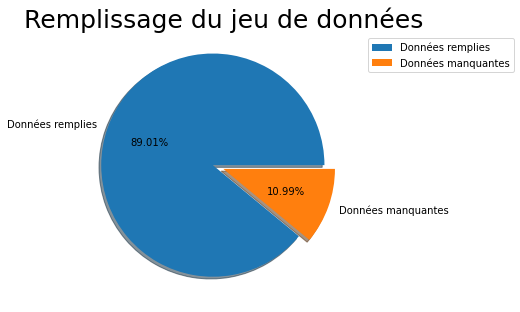

In [58]:
taux_remplissage(data)

In [59]:
# On récupère l'énergie totale et les emissions de CO2
TotalEnergyUse = data["SiteEnergyUse(kBtu)"]
TotalCO2 = data["TotalGHGEmissions"]

# On calcule les proportions de chaque source d'énergie 
data["Electricity"] = data["Electricity(kBtu)"]/data["SiteEnergyUse(kBtu)"]
data["NaturalGas"] = data["NaturalGas(kBtu)"]/data["SiteEnergyUse(kBtu)"]
data["SteamUse"] = data["SteamUse(kBtu)"]/data["SiteEnergyUse(kBtu)"]
data["OtherFuelUse"] = data["OtherFuelUse(kBtu)"]/data["SiteEnergyUse(kBtu)"]

In [60]:
# On supprime les colonnes renseignant les quantités d'énergie (kBtu et kWh) et de CO2 émis
col_to_del = []
for col in data :
    if ('kBtu' in col) or  ('kWh' in col) or ('CO2' in col) :
        col_to_del.append(col)
        
data.drop(columns=col_to_del, inplace=True)

# On récupère l'énergie totale et les emissions de CO2
data["SiteEnergyUse(kBtu)"] = TotalEnergyUse
data["TotalGHGEmissions"] = TotalCO2

In [62]:
#Complétion des NaN par 0
data["ThirdLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
data["SecondLargestPropertyUseTypeGFA"].fillna(0, inplace=True)
data["NumberofFloors"].fillna(0, inplace=True)

In [64]:
#Complétion des NaN par No information
nan_no_information = ['LargestPropertyUseType', 'SecondLargestPropertyUseType',
              'ThirdLargestPropertyUseType']
data[nan_no_information] = data[nan_no_information].fillna('No information')

In [65]:
#Suppression des lignes NaN (faible en nombre)
data = data[~((data['SiteEnergyUse(kBtu)'].isnull()) | 
              (data['TotalGHGEmissions'].isnull())   |
              (data['ListOfAllPropertyUseTypes'].isnull()))]

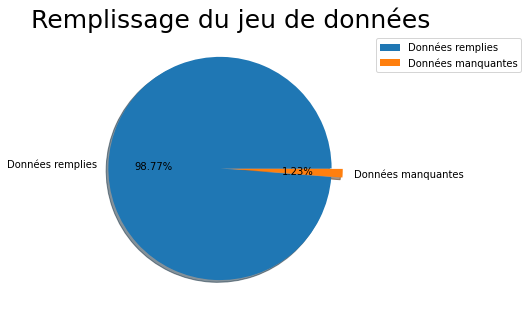

In [68]:
taux_remplissage(data)

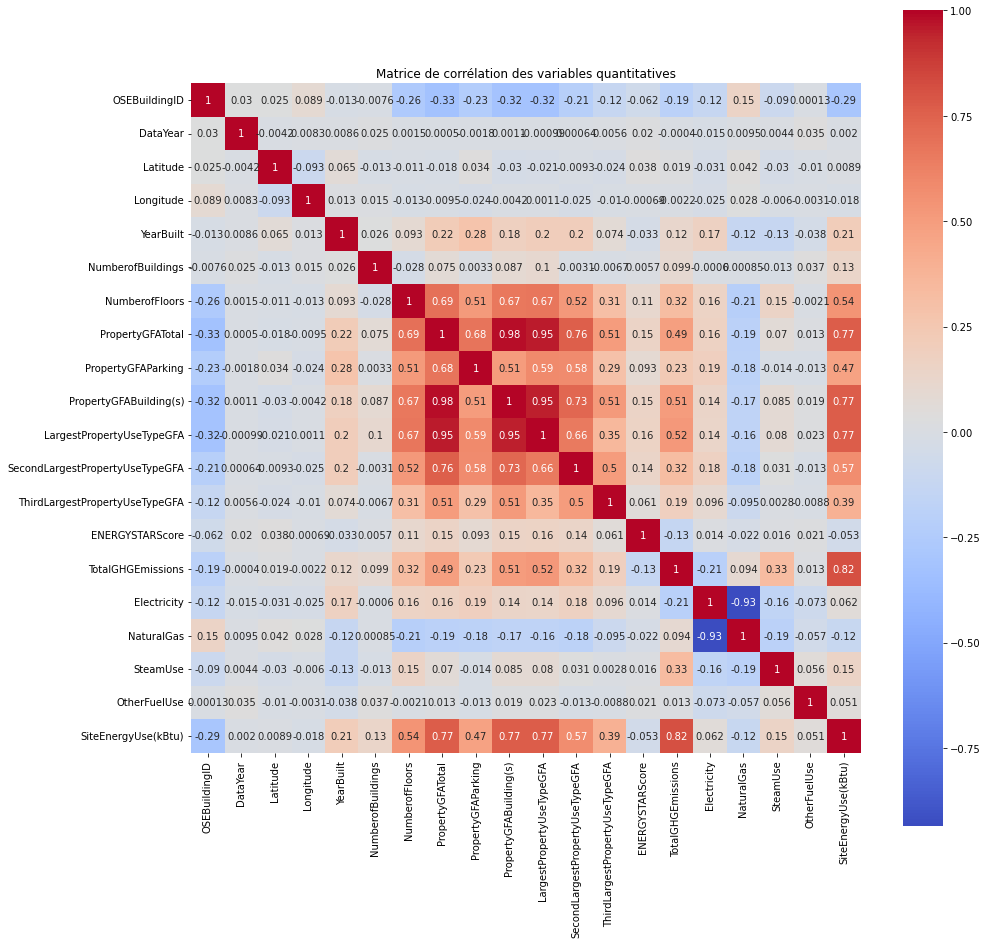

In [69]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), square=True, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

In [70]:
data.corr()

,OSEBuildingID,DataYear,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,TotalGHGEmissions,Electricity,NaturalGas,SteamUse,OtherFuelUse,SiteEnergyUse(kBtu)
OSEBuildingID,1.000000,0.029957,0.025229,0.089115,-0.013416,-0.007578,-0.256667,-0.328592,-0.232781,-0.318280,-0.320465,-0.213295,-0.122051,-0.062449,-0.190642,-0.119794,0.149485,-0.089570,0.000131,-0.294671
DataYear,0.029957,1.000000,-0.004161,0.008267,0.008553,0.024678,0.001458,0.000502,-0.001759,0.001091,-0.000992,0.000645,0.005552,0.020006,-0.000400,-0.014968,0.009535,0.004367,0.034610,0.002036
Latitude,0.025229,-0.004161,1.000000,-0.093110,0.065092,-0.012576,-0.010824,-0.017707,0.033842,-0.030418,-0.021476,-0.009271,-0.024496,0.038139,0.019360,-0.030633,0.041902,-0.030395,-0.010316,0.008854
Longitude,0.089115,0.008267,-0.093110,1.000000,0.012904,0.014823,-0.012679,-0.009458,-0.024128,-0.004177,0.001070,-0.025038,-0.009956,-0.000692,-0.002203,-0.025382,0.027646,-0.006015,-0.003145,-0.017851
YearBuilt,-0.013416,0.008553,0.065092,0.012904,1.000000,0.025745,0.092545,0.221318,0.280334,0.179037,0.200538,0.204099,0.073905,-0.032916,0.119427,0.171549,-0.124189,-0.125364,-0.038161,0.211015
NumberofBuildings,-0.007578,0.024678,-0.012576,0.014823,0.025745,1.000000,-0.028223,0.074663,0.003250,0.086517,0.104849,-0.003094,-0.006747,0.005743,0.098601,-0.000598,0.000854,-0.012879,0.036931,0.133544
NumberofFloors,-0.256667,0.001458,-0.010824,-0.012679,0.092545,-0.028223,1.000000,0.693524,0.512188,0.665786,0.674474,0.520263,0.310480,0.112518,0.321871,0.161163,-0.209602,0.146258,-0.002057,0.544007
PropertyGFATotal,-0.328592,0.000502,-0.017707,-0.009458,0.221318,0.074663,0.693524,1.000000,0.677014,0.977597,0.954974,0.762986,0.508489,0.150703,0.491520,0.164998,-0.189169,0.069607,0.012757,0.771229
PropertyGFAParking,-0.232781,-0.001759,0.033842,-0.024128,0.280334,0.003250,0.512188,0.677014,1.000000,0.506935,0.586091,0.578324,0.291340,0.093200,0.234891,0.186695,-0.179803,-0.013516,-0.013270,0.474034
PropertyGFABuilding(s),-0.318280,0.001091,-0.030418,-0.004177,0.179037,0.086517,0.665786,0.977597,0.506935,1.000000,0.950860,0.728226,0.512231,0.152060,0.508500,0.139855,-0.170135,0.085391,0.018737,0.767708


In [71]:
# Suppression des features 'LargestPropertyUseTypeGFA' et 'PropertyGFATotal' pour éviter redondance d'informations
data.drop(columns=['LargestPropertyUseTypeGFA', 'PropertyGFATotal',], inplace=True)

In [73]:
data.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                0
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                    1050
TotalGHGEmissions                     0
Electricity                           0
NaturalGas                            0
SteamUse                              0
OtherFuelUse                          0
SiteEnergyUse(kBtu)                   0


In [74]:
data = data.reset_index()

In [75]:
data.drop(["index"], axis=1, inplace=True)

In [76]:
#Je factorise la variable DataYear et YearBuilt pour conserver une seule variable age du batiment
data["AgeBuilding"] = data["DataYear"] - data["YearBuilt"]

<AxesSubplot:xlabel='AgeBuilding', ylabel='Count'>

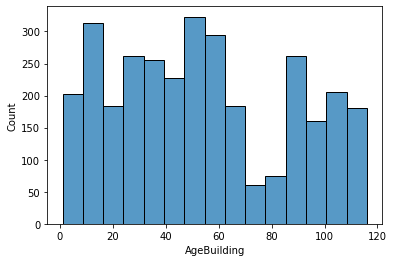

In [77]:
sns.histplot(data["AgeBuilding"])

### Analyse univariée

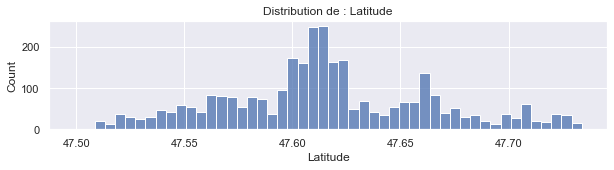

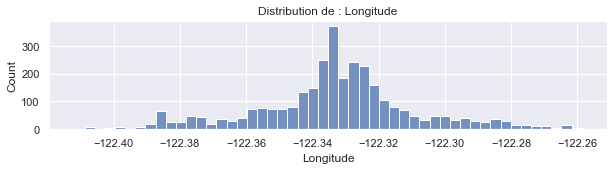

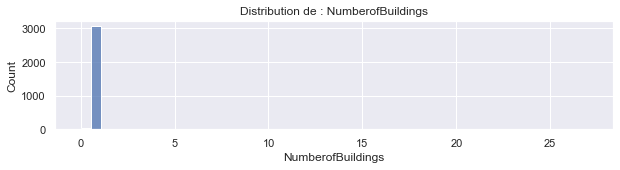

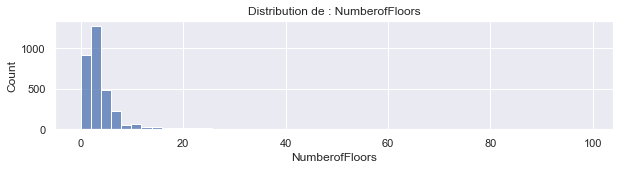

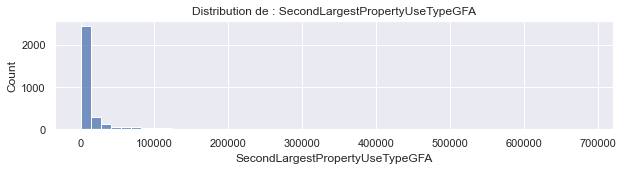

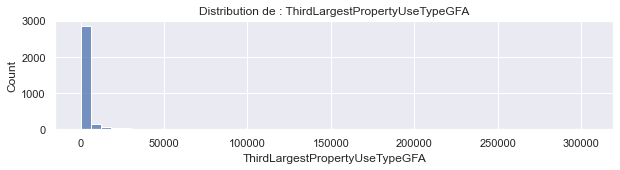

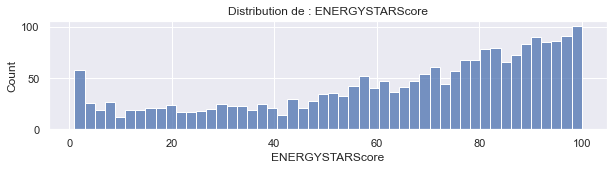

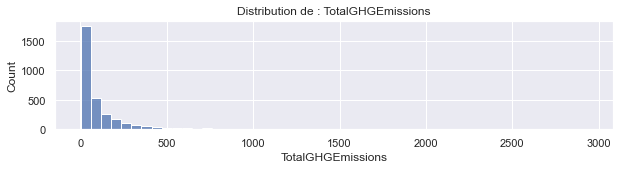

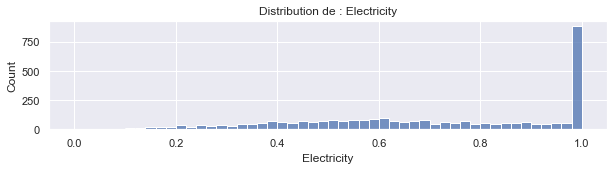

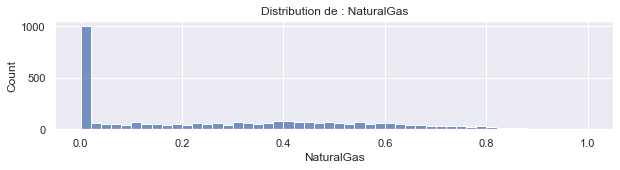

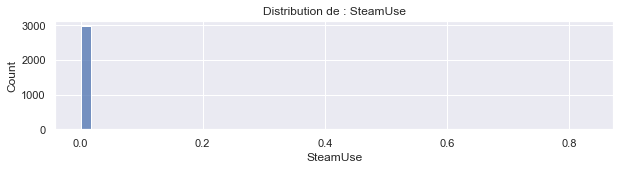

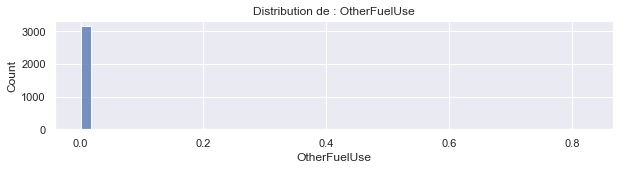

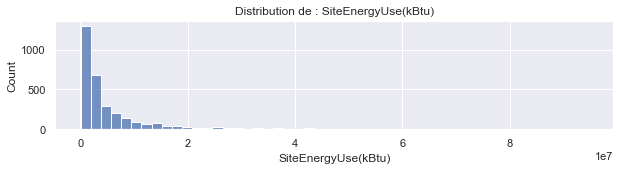

In [78]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.histplot(data[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

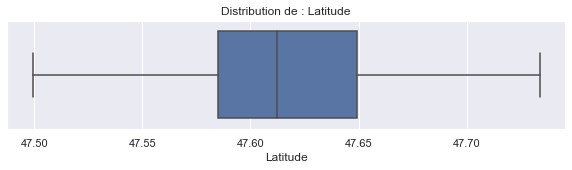

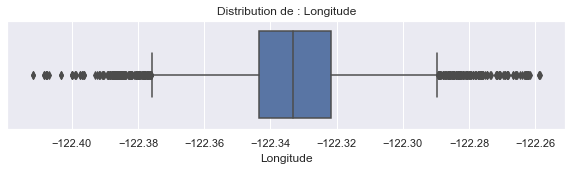

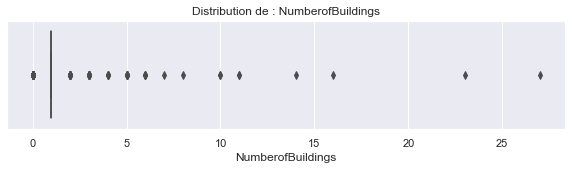

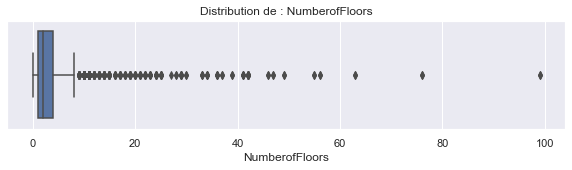

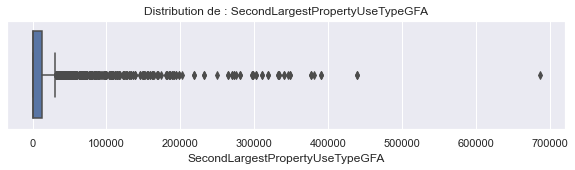

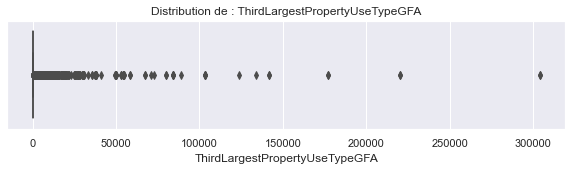

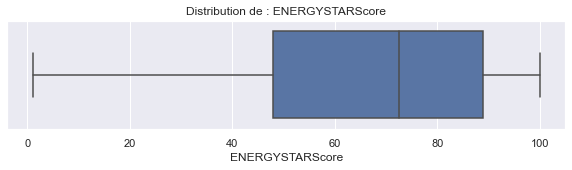

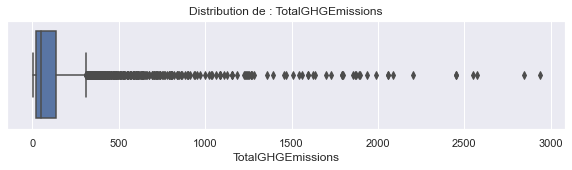

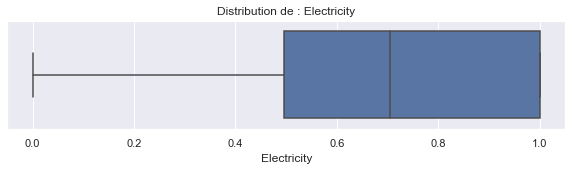

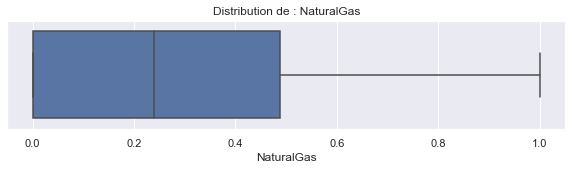

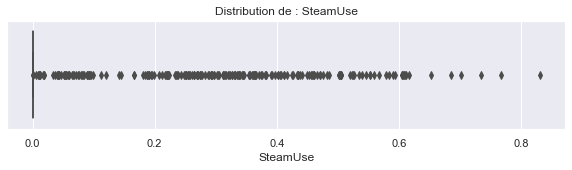

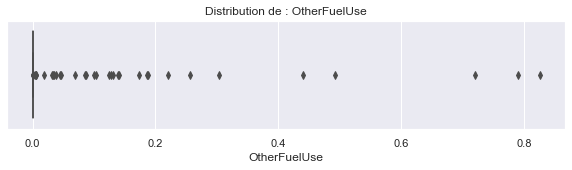

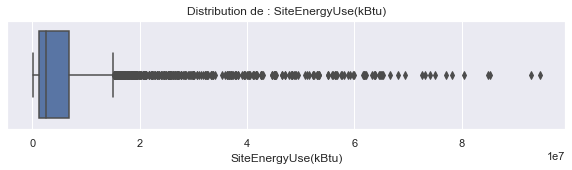

In [79]:
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

Text(0.5, 1.0, 'Graphe des propery type')

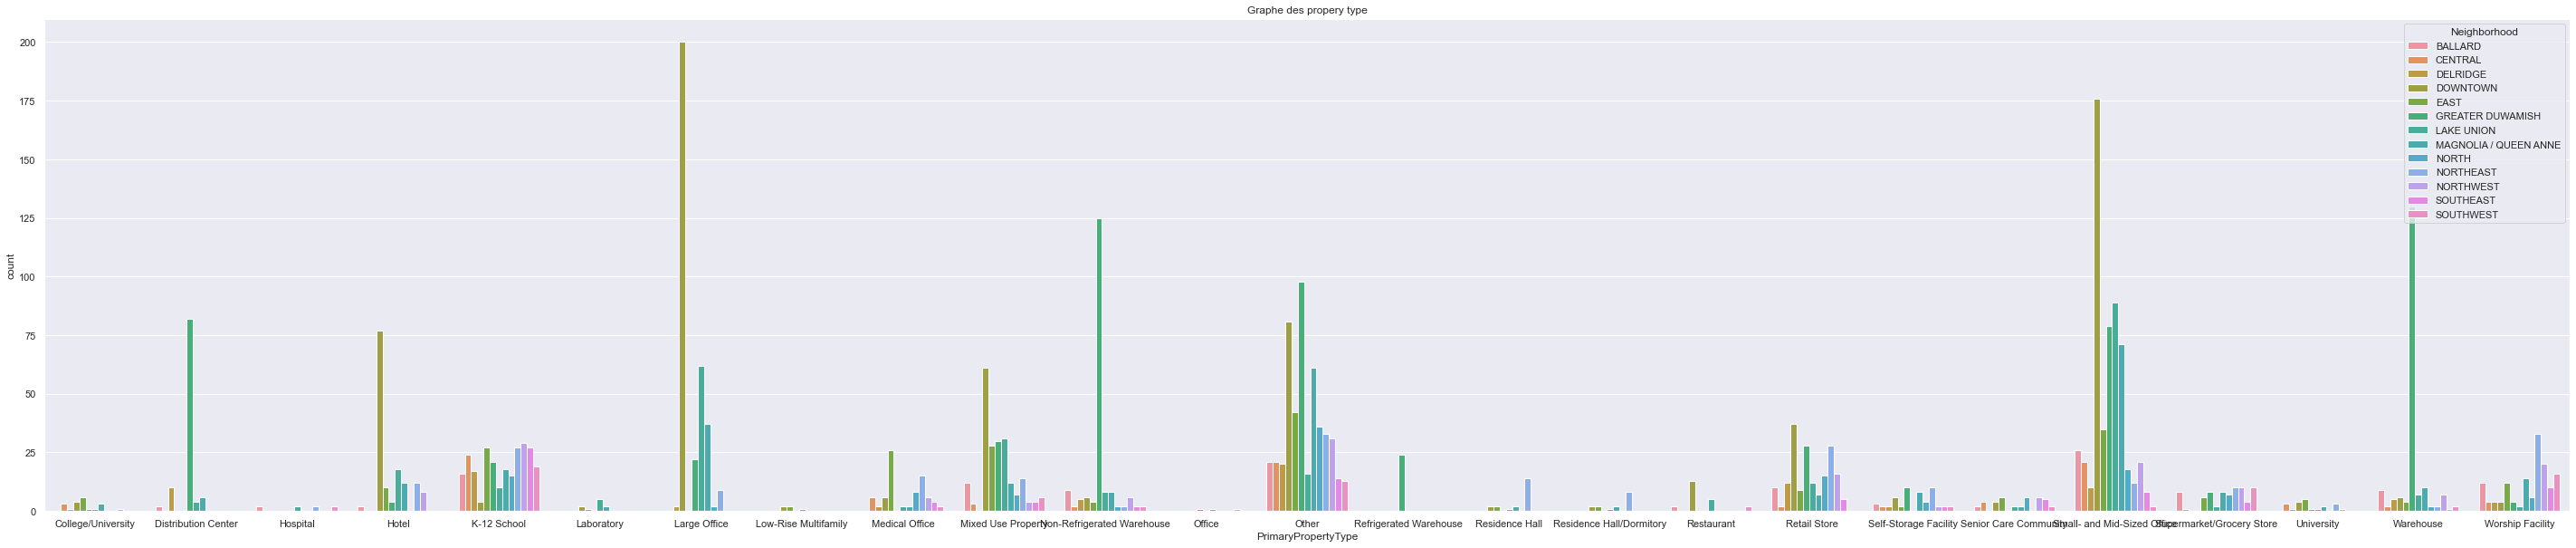

In [80]:
plt.figure(figsize=(50,10))
sns.countplot(x=data['PrimaryPropertyType'].sort_values(ascending=True),hue=data['Neighborhood'].sort_values(ascending=True))
plt.title('Graphe des property type')

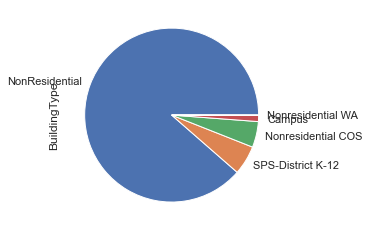

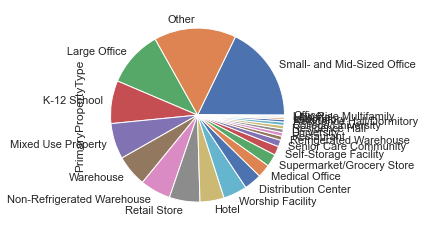

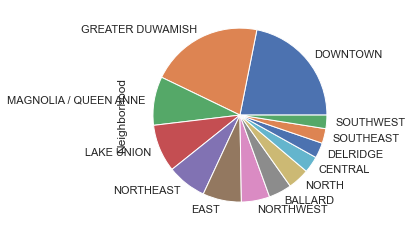

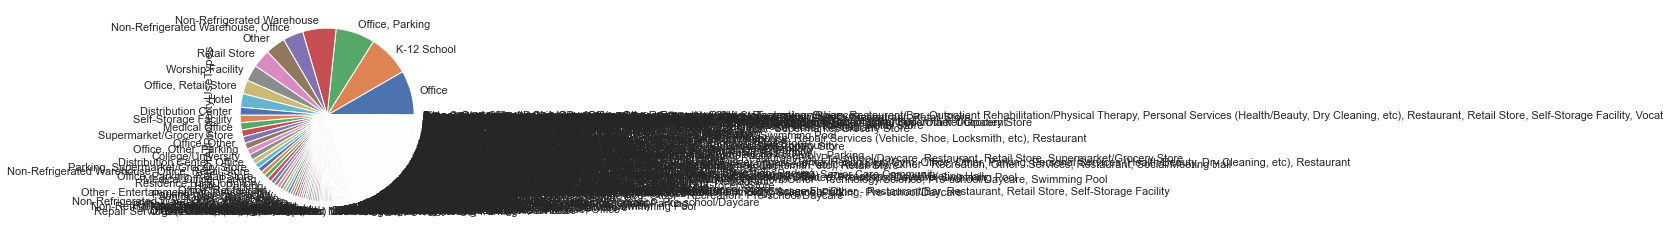

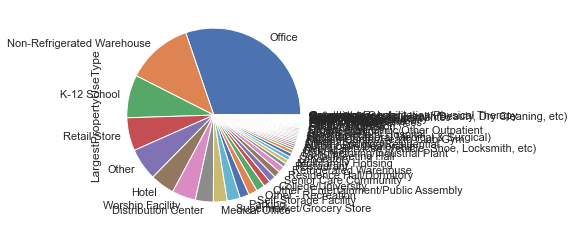

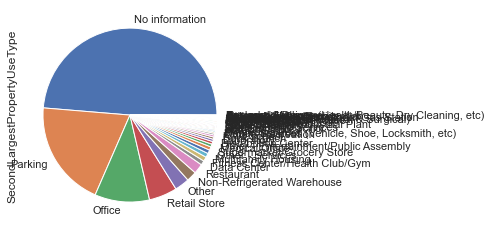

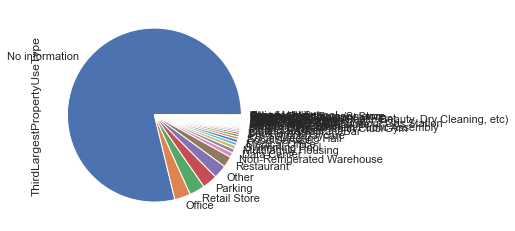

In [81]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

### Analyse multivariée

In [82]:
#sns.pairplot(data)

In [83]:
data.groupby("PrimaryPropertyType")["TotalGHGEmissions"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                       1169.795000
Laboratory                      849.424000
Hotel                           395.684755
Senior Care Community           378.283333
College/University              325.243000
University                      234.885714
Supermarket/Grocery Store       230.141622
Large Office                    205.233443
Restaurant                      196.527273
Other                           191.004805
Medical Office                  190.749241
Mixed Use Property              153.584340
Residence Hall                  101.265714
K-12 School                      92.085079
Retail Store                     90.332818
Residence Hall/Dormitory         70.231333
Distribution Center              47.107308
Warehouse                        42.494492
Worship Facility                 42.183050
Non-Refrigerated Warehouse       40.126188
Small- and Mid-Sized Office      39.949331
Refrigerated Warehouse           36.185000
Self-Storage Facility            2

In [84]:
data.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                       4.140874e+07
Laboratory                     2.629313e+07
Large Office                   1.756832e+07
Hotel                          1.221710e+07
College/University             1.211809e+07
Senior Care Community          1.170678e+07
University                     1.170304e+07
Supermarket/Grocery Store      9.996416e+06
Medical Office                 9.671097e+06
Other                          8.151762e+06
Mixed Use Property             7.757086e+06
Restaurant                     5.372867e+06
Retail Store                   4.965976e+06
Residence Hall                 3.810723e+06
Refrigerated Warehouse         3.665475e+06
K-12 School                    3.074691e+06
Small- and Mid-Sized Office    2.603608e+06
Distribution Center            2.362230e+06
Residence Hall/Dormitory       2.197124e+06
Low-Rise Multifamily           1.968272e+06
Warehouse                      1.961577e+06
Non-Refrigerated Warehouse     1.737750e+06
Worship Faci

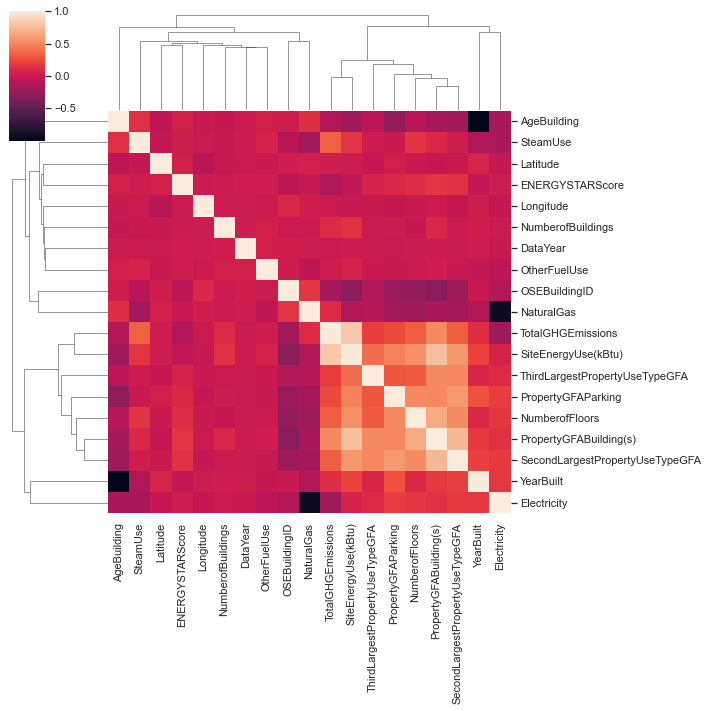

In [85]:
sns.clustermap(data.corr())

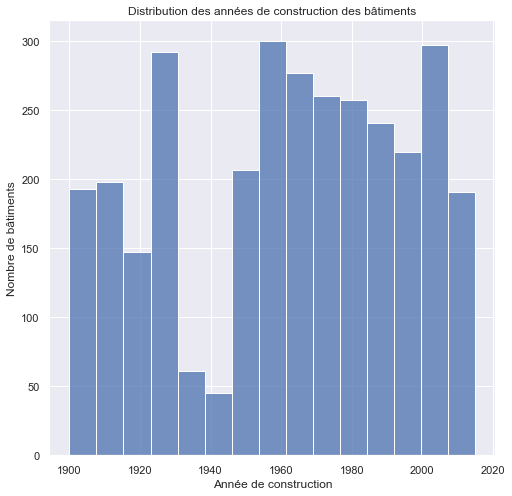

In [86]:
fig = plt.figure(figsize=(8,8))
ax = sns.histplot(data=data, x='YearBuilt')
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution des années de construction des bâtiments")
plt.show()

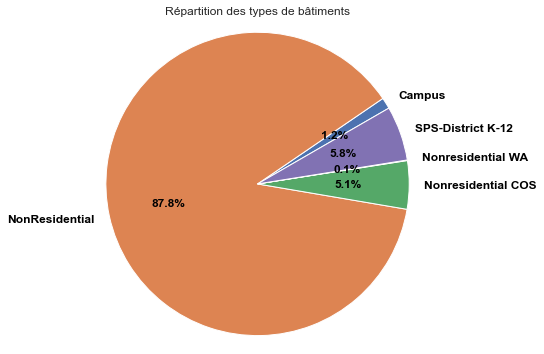

In [87]:
building_type = data.groupby(by='BuildingType')['OSEBuildingID'].nunique()

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=False, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments")
plt.show()

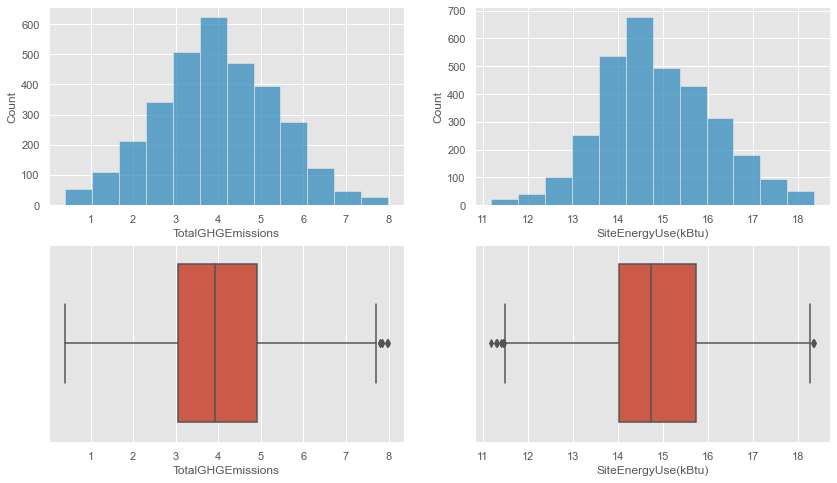

In [88]:
# Variable cible/target/à étiquettes avec une transformation log
plt.style.use('ggplot')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.histplot(data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(data))))
    plt.subplot(2,2,i+3)
    sns.boxplot(data[label].apply(lambda x : np.log(1 + x)))
plt.show()

In [89]:
data.drop(['OSEBuildingID','DataYear',"YearBuilt","Latitude","Longitude"], axis=1, inplace=True)

Transformation des données catégorielles avec OneHotEncoder 

In [93]:
col_cate = list(data.columns[data.dtypes == 'object'])

In [94]:
from sklearn.preprocessing import OneHotEncoder

# Applicaiton de one-hot encoder pour transformer les données catégoriels
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
transformed = ohe.fit_transform(data[col_cate])
transformed_df = pd.DataFrame(transformed, columns=ohe.get_feature_names_out(input_features=col_cate))


# One-hot encoding mise à jour des indexs
transformed_df.index = data.index

In [95]:
num_data = data.drop(col_cate, axis=1)

# ajout des colonnes one-hot encoded au numerical features
data = pd.concat([num_data, transformed_df], axis=1)

Standardisation des données avec StandardScaler

In [96]:
data = pd.DataFrame(data, columns=data.columns)

num_cols = data.columns

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

preprocessor = ColumnTransformer(transformers=[('num', SS, num_cols)])
data[num_cols] = preprocessor.fit_transform(data)

In [98]:
print((data.isnull().mean()).sort_values(ascending=[False]))

ENERGYSTARScore                                                                                  0.329567
NumberofBuildings                                                                                0.000000
ListOfAllPropertyUseTypes_Other, Other - Entertainment/Public Assembly, Self-Storage Facility    0.000000
ListOfAllPropertyUseTypes_Other - Recreation, Parking, Restaurant                                0.000000
ListOfAllPropertyUseTypes_Other - Recreation, Parking, Swimming Pool                             0.000000
                                                                                                   ...   
ListOfAllPropertyUseTypes_Hotel, Other, Parking, Restaurant, Retail Store                        0.000000
ListOfAllPropertyUseTypes_Hotel, Parking                                                         0.000000
ListOfAllPropertyUseTypes_Hotel, Parking, Restaurant                                             0.000000
ListOfAllPropertyUseTypes_Hotel, Parking, Rest

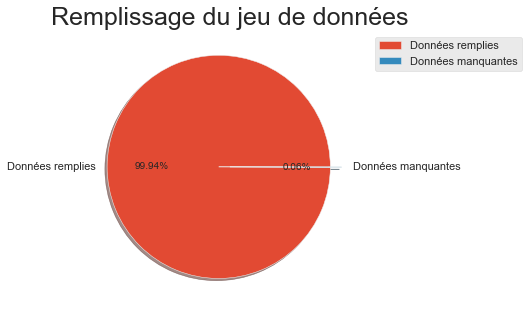

In [99]:
taux_remplissage(data)

In [100]:
df_energy = data.copy()

In [101]:
df_energy.to_csv(r'/Users/gauthierrault/Desktop/Projet_4/df_energy.csv')

In [102]:
data = data.drop(["ENERGYSTARScore"], axis=1)

In [103]:
data.to_csv(r'/Users/gauthierrault/Desktop/Projet_4/data_clean.csv')

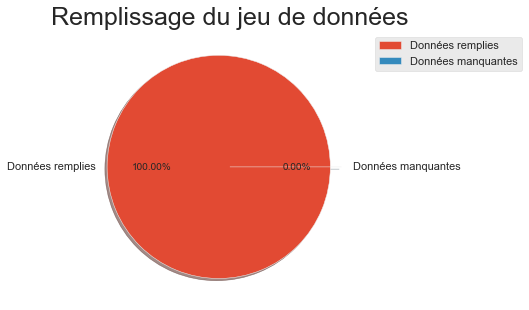

In [104]:
taux_remplissage(data)